In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

In [2]:
ip = pd.read_csv('..\data\cleandata\Info pluviometricas\Merged Data\merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(list(ip.columns))
ip.head()

['Data', 'Hora', 'Data / Hora', 'UmidadeRelativa_0', 'PressaoAtmosferica_0', 'Temperatura do Ar_0', 'TemperaturaInterna_0', 'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0', 'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0', 'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'Temperatura do Ar_1', 'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1', 'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1', 'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2', 'PressaoAtmosferica_2', 'Temperatura do Ar_2', 'TemperaturaInterna_2', 'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2', 'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2', 'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'Temperatura do Ar_3', 'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3', 'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento_3', 'Precipitacao_3', 'Local_3', 'UmidadeRelativa_4', 'PressaoAtmosferica_4', 'Temperatura do Ar_4', 'Tem

,Data,Hora,Data / Hora,UmidadeRelativa_0,PressaoAtmosferica_0,Temperatura do Ar_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,...,UmidadeRelativa_mean,PressaoAtmosferica_mean,SensacaoTermica_mean,RadiacaoSolar_mean,DirecaoDoVento_mean,VelocidadeDoVento_mean,Precipitacao_mean,PontoDeOrvalho_mean,Temperatura do Ar_mean,TemperaturaInterna_mean
0,30/06/11,23:45:59,30/06/11 23:45:59,81.7,926.8,17.5,19.6,14.4,NaN,0.0,...,83.22,927.70,NaN,0.0,134.8,1.16,0.0,14.24,17.08,20.04
1,30/06/11,23:32:00,30/06/11 23:32:00,84.3,926.8,17.1,19.6,14.4,NaN,0.0,...,84.20,927.70,NaN,0.0,90.0,1.10,0.0,14.20,16.90,20.00
2,30/06/11,23:15:59,30/06/11 23:15:59,82.1,926.9,17.6,19.6,14.6,NaN,0.0,...,84.82,927.80,NaN,0.0,108.6,0.96,0.0,14.28,16.86,20.04
3,30/06/11,23:01:59,30/06/11 23:01:59,83.0,927.0,17.5,19.7,14.5,NaN,0.0,...,84.98,927.82,NaN,0.0,95.0,0.90,0.0,14.22,16.92,20.26
4,30/06/11,22:45:59,30/06/11 22:45:59,82.6,926.8,17.6,19.7,14.6,NaN,0.0,...,84.68,927.70,NaN,0.0,115.6,1.12,0.0,14.24,16.98,20.34


#### Umidade Relativa 

In [3]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4,UmidadeRelativa_mean
0,81.7,79.0,83.4,88.6,83.4,83.22
1,84.3,81.0,83.1,88.7,83.9,84.20
2,82.1,86.6,83.7,87.9,83.8,84.82
3,83.0,87.8,82.0,87.5,84.6,84.98
4,82.6,87.8,82.3,87.6,83.1,84.68


#### Derivada

In [5]:
d_um0 = np.gradient(um[cols_um[0]])

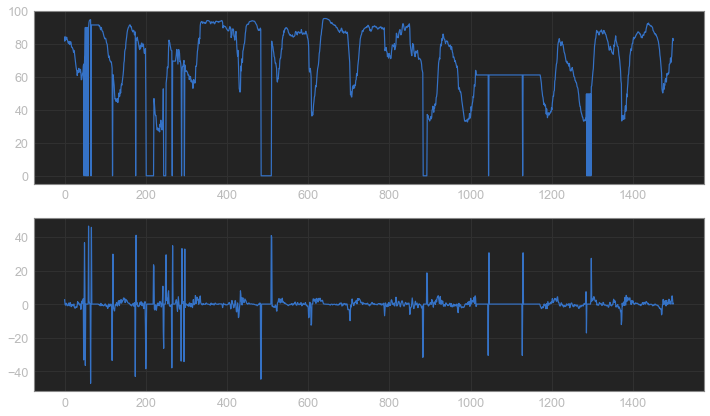

In [8]:
start = 0
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])
plt.show()

#### Derivada muito alta

In [15]:
threshold = 15
high_d = []
for i in range(len(d_um0)):
    if abs(d_um0[i]) > threshold:
        high_d.append(True)
    else:
        high_d.append(False)

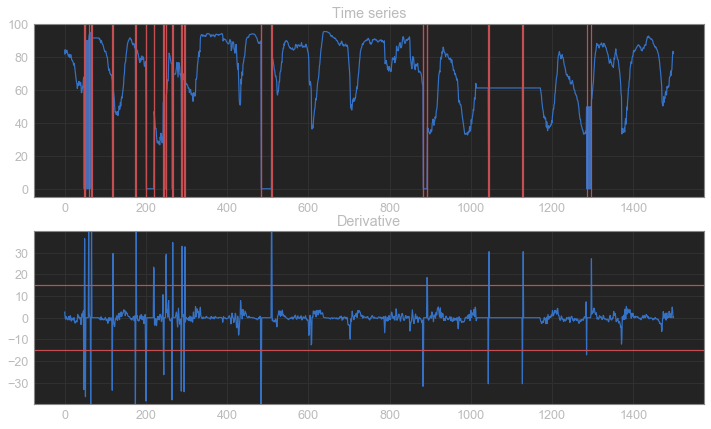

In [16]:
start = 0
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])
ax2.axhline(threshold , c = 'r')
ax2.axhline(-threshold, c = 'r')
i = 0
for d in high_d: # plot vertical lines  -- cannot plot multiple lines at once
    if d and i > start and i < stop:
        ax1.axvline(i, ymin=-30, ymax=30, c = 'r', alpha = 1)
    i = i + 1
ax2.set_yticks(np.arange(-30,31,10))
ax2.set_ylim(-40,40)
ax1.set_title('Time series')
ax2.set_title('Derivative')
plt.show()

### Derivada zero

In [40]:
n_zeros = 5
is_const = []
for i in range(len(d_um0)):
    aux = True
    for n in range(n_zeros):
        aux = aux and (d_um0[i + n] == 0 or d_um0[i - n] == 0)
    is_const.append(aux)

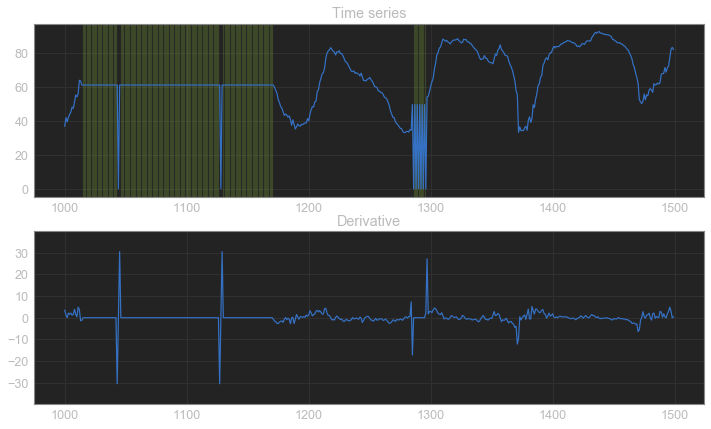

In [41]:
start = 1000
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)

i = 0
for d in is_const: # plot vertical lines  -- cannot plot multiple lines at once
    if d and i > start and i < stop:
        ax1.axvline(i, ymin=-30, ymax=30, c = 'g', alpha = 0.25)
    i = i + 1

ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])

ax2.set_yticks(np.arange(-30,31,10))
ax2.set_ylim(-40,40)
ax1.set_title('Time series')
ax2.set_title('Derivative')
plt.show()

### Dados com erro

In [42]:
is_error = [is_const[i] or high_d[i] for i in range(len(high_d))]

### Create regions

In [43]:
regions = []
i = 0
status = False
for bool_ in is_error:
    if bool_ and not status:
        start = i
        status = True
    if not bool_ and status:
        end = i
        status = False
        regions.append([start,end])
    i += 1

In [50]:
is_error

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,

In [49]:
regions

[[47, 48],
 [49, 50],
 [51, 55],
 [56, 60],
 [64, 65],
 [66, 84],
 [117, 118],
 [119, 120],
 [174, 175],
 [176, 177],
 [200, 221],
 [243, 245],
 [249, 251],
 [264, 265],
 [266, 269],
 [271, 273],
 [287, 288],
 [289, 290],
 [294, 295],
 [296, 297],
 [483, 511],
 [882, 894],
 [1015, 1044],
 [1045, 1128],
 [1129, 1171],
 [1285, 1296],
 [1297, 1298],
 [1662, 1663],
 [1664, 1665],
 [1729, 1730],
 [1731, 1732],
 [2055, 2056],
 [2057, 2058],
 [2203, 2204],
 [2205, 2206],
 [2226, 2227],
 [2228, 2229],
 [2231, 2233],
 [2322, 2323],
 [2324, 2325],
 [2467, 2471],
 [2479, 2480],
 [2481, 2482],
 [2487, 2579],
 [2688, 2689],
 [2690, 2691],
 [2728, 2729],
 [2730, 2731],
 [3663, 3664],
 [3665, 3666],
 [3941, 3942],
 [3943, 3944],
 [3946, 3947],
 [3948, 3949],
 [3952, 3953],
 [3954, 3955],
 [3971, 3972],
 [3973, 3974],
 [4023, 4024],
 [4025, 4026],
 [4074, 4075],
 [4076, 4077],
 [4191, 4192],
 [4193, 4194],
 [4215, 4216],
 [4220, 4234],
 [4235, 4236],
 [4239, 4241],
 [4306, 4350],
 [4525, 4526],
 [4527

### Increase Margins

In [44]:
margin = 2
regions_marg = []
for reg in regions:
    regions_marg.append([reg[0] - margin, reg[1] + margin]) 

### Compare with and without margins

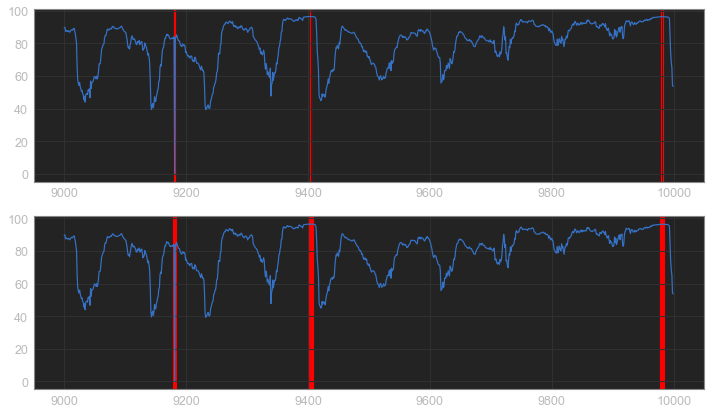

In [48]:
start = 0
stop  = 1000

plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
for reg in regions:
    if reg[0] > start and reg[1] < stop:
        ax1.axvspan(reg[0] , reg[1], color = 'red')
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
        
ax2 = plt.subplot(212)
for reg in regions_marg:
    if reg[0] > start and reg[1] < stop:
        ax2.axvspan(reg[0], reg[1], color = 'red')
ax2.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])

plt.show()

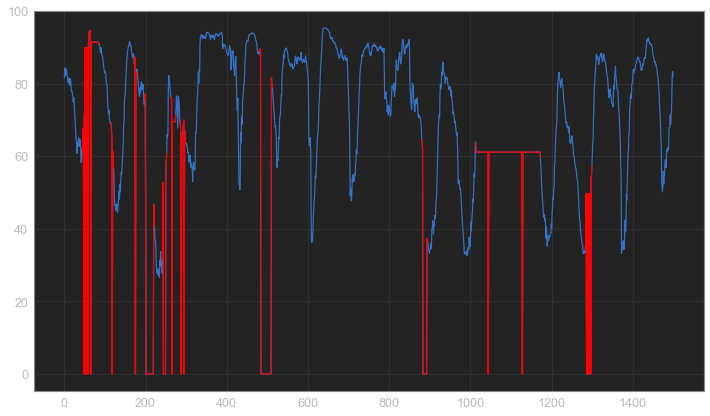

In [46]:
start = 0
stop = 1500

plt.figure(figsize =  (12,7))
plt.plot(um[cols_um[0]][start:stop].index,um[cols_um[0]][start:stop])
for reg in regions_marg:
    if reg[0] > start and reg[1] < stop:
        x = list(range(reg[0],reg[1]))
        y = um[cols_um[0]][reg[0]:reg[1]]
        plt.plot(x, y, color = 'red')
plt.show()